# Bert Fine-Tuning for Multi-class classification

To confirm that the GPU is detected.

In [2]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
print(tf.__version__)

2.6.0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [39]:
import os
training_files_path = 'C:/Users/heihe/Desktop/Malaysia-Legal-Doc-Classification/classification_nlp/training_data'
testing_files_path = 'C:/Users/heihe/Desktop/Malaysia-Legal-Doc-Classification/classification_nlp/testing_data'

In [40]:
def categories_list(training_files_path):
    categories = []
    for root, dirs, files in os.walk(training_files_path):
        for i in range (len(dirs)):
            categories.append (dirs[i])
    return categories
    print (f"categories = {categories}")

In [43]:
categories = categories_list(training_files_path)

In [44]:
import sklearn.datasets as skd

legal_train = skd.load_files(training_files_path, categories= categories, encoding= 'ISO-8859-1')
legal_test = skd.load_files(testing_files_path,categories= categories, encoding= 'ISO-8859-1')
print ('data loaded')

data loaded


In [45]:
import textwrap
import random

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80) 

# Randomly choose some sample to check the content
for i in range(len(legal_train.target)):
    
    # Choose a random sample by index.
    j = random.choice(range(len(legal_train.data)))
    
    # Get the text as 'x' and the label integer as 'y'.
    x = legal_train.data[j]
    y = legal_train.target[j]

    # Print out the name of the category and the text.
    print('')
    print('========', legal_train.target_names[y], '========')
    print(wrapper.fill(x))
    print('')


======== Dangerous Drugs ========
[2018] 7 CLJ   A      PP v. Sopian Othman & Anor   And Another Case      501
PP v. SOPIAN OTHMAN & ANOR AND ANOTHER CASE   HIGH COURT MALAYA, SHAH ALAM   SM
KOMATHY JC   [CRIMINAL TRIAL NOS: 45A-100-09-2015 & 45-15-09-2015]   20 MARCH
2018      B      C      D      E      F      G      H      I      CRIMINAL LAW:
Dangerous drugs â Trafficking â Drugs found in car and pocket   of trousers
â Whether drugs seized analysed and confirmed by chemist to be   dangerous
drugs â Whether drugs tampered with â Whether there was proper   handling of
drug exhibits â Whether there was break in chain of evidence â   Whether
ingredients of trafficking satisfied â Whether prosecution successfully
established prima facie case â Penal Code, ss. 39B(1)(a) & 12(2)   EVIDENCE:
Witness â Credibility â Testimony of witness in drug-trafficking   charge
â Whether testimony reliable â Whether testimony probable â Whether
statements consistent â Whet

[2019] 5 CLJ   A      B      C      D      E      F      G      H      I
Datoâ Sri Mohd Najib Hj Abdul Razak   v. PP      23      DATOâ SRI MOHD
NAJIB HJ ABDUL RAZAK v. PP   COURT OF APPEAL, PUTRAJAYA   ZABARIAH MOHD YUSOF
JCA   RHODZARIAH BUJANG JCA   LAU BEE LAN JCA   [CRIMINAL APPEAL NO:
W-05-1-01-2019]   25 MARCH 2019   CRIMINAL LAW: Charges â Criminal charges â
Former Prime Minister of   Malaysia charged with seven criminal charges relating
to offences under Penal Code,   Malaysian Anti-Corruption Commission Act 2009
and Anti-Money Laundering,   Anti-Terrorism Financing and Proceeds of Unlawful
Activities Act 2001 â Appeal   against decision of High Court in dismissing
pre-trial production, by prosecution,   of statements and documents given by
potential witnesses to officers of Malaysian   Anti-Corruption Commission â
Whether appeal ought to be allowed   CRIMINAL PROCEDURE: Disclosure of
information â Statements and   documents â Appeal against decision of High
Co

[2018] 3 CLJ      Chew Wai Keong & Anor v.   PP & Another Appeal      681      A
CHEW WAI KEONG & ANOR v. PP & ANOTHER APPEAL      B      FEDERAL COURT,
PUTRAJAYA   AHMAD MAAROP CJ (MALAYA)   ZAINUN ALI FCJ   AZAHAR MOHAMED FCJ
ZAHARAH IBRAHIM FCJ   AZIAH ALI FCJ   [CRIMINAL APPEALS NO: 05-38-02-2014(A) &
05-37-02-2014(A)]   23 FEBRUARY 2018      C      CRIMINAL LAW: Kidnapping Act
1961 â Section 3 â Whether forceful and   wrongful detention established â
Whether kidnapped for ransom â Whether   kidnapper was able to exert will over
kidnapped person â Whether kidnapper had   knowledge of abduction and
captivation â Whether there was incriminating   evidence against kidnapper
D      CRIMINAL LAW: Murder â Common intention â Whether circumstantial
evidence established that accused persons were perpetrators of offences in
furtherance   of common intention â Whether acted in concert to kidnap and
murder deceased   â Whether pre-arranged plan proved â Kidnapping Act 19

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Let's look at the classes to see how balanced they are.

C:\Users\heihe\anaconda3\envs\MyDocClass\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Training Samples')

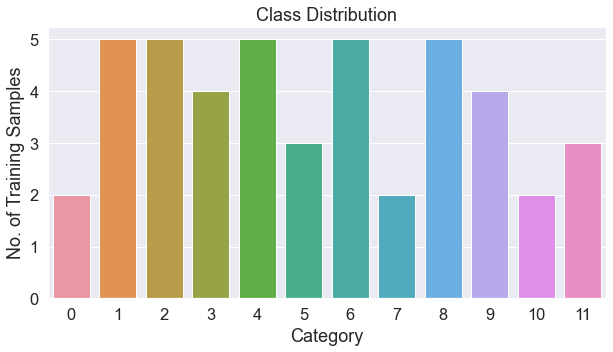

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)


# Plot the number of tokens of each length.
sns.countplot(legal_train.target)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('No. of Training Samples')

Observation: The data sample is unbalance, the data is not even for Category 0, 5, 6, 7, and 10.
Check out the way to manage uneven data sample!!

# Tokenization

In [6]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer----------')
# tokenizer = bert.tokenization.FullTokenizer(
#     vocab_file=os.path.join(gs_folder_bert, "vocab.txt"),
#      do_lower_case=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer----------


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`